In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import gc
import os 
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

# README
This notebook show the test on isolated galaxies (center known)

2023/05/10 03:11:51 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].


Making Basic Simulation. ID: 2


5

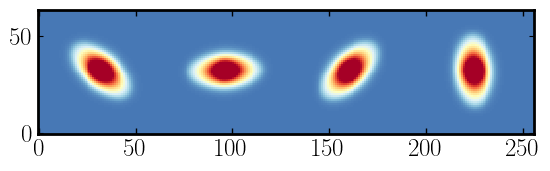

In [2]:
shear_value = 0.02
scale = 0.168
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psfData = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=64, ny=64, scale=scale).array

# Four Galaxies to cancel spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
gal_data = fpfs.simutil.make_basic_sim(
    outDir,psf_obj=psfInt,gname='g1-2222',
    ind0=2,ny=64,nx=256, scale=scale,
    do_write=False,return_array=True,
    shear_value = shear_value)
plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
gc.collect()

In [3]:
# Now we measure shear
rcut = 32

# fake detection
indX = np.arange(32, 256, 64)
indY = np.arange(32, 64, 64)
inds = np.meshgrid(indY, indX, indexing="ij")
coords = np.vstack(inds).T

In [4]:
fpTask  =   fpfs.image.measure_source(psfData, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp

2023-05-10 03:11:53.717695: I external/xla/xla/service/service.cc:168] XLA service 0x55d3bd2448f0 initialized for platform Interpreter (this does not guarantee that XLA will be used). Devices:
2023-05-10 03:11:53.717726: I external/xla/xla/service/service.cc:176]   StreamExecutor device (0): Interpreter, <undefined>
2023-05-10 03:11:53.724231: I external/xla/xla/pjrt/tfrt_cpu_pjrt_client.cc:218] TfrtCpuClient created.
2023/05/10 03:11:53 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/05/10 03:11:53 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-10 03:11:53.725569: I external/xla/xla/stream_executor/tpu/tpu_initializer_helper.cc:269] Libtpu path is: libtpu.so
2023-05-10 03:11:53.725942: I external/xla/xla/stream_executor/tpu/tpu_initializer_helper.cc:277] Failed to open libtpu: libtpu.so: cannot open shared object file: No such file or directory
2023

In [5]:
print('Input shear is: %.6f' %shear_value)
print('Estimated shear is: %.6f' %shear)

Input shear is: 0.020000
Estimated shear is: 0.020001
